In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
stock = "TSLA"
df = yf.download(stock,start="2024-01-01",end="2025-01-01")
df = df[['Close']] #keeping only closing prices

[*********************100%***********************]  1 of 1 completed


In [3]:
# Compute rate of change

df['ROC'] = df['Close'].pct_change(periods=5) * 100

df['SMA_20'] = df['Close'].rolling(window=20).mean() # 20 dat SMA
df['SMA_50'] = df['Close'].rolling(window=50).mean() # 50 day SMA

In [4]:
# Define Buy and Sell Signals

df['Signal'] = 0

# Buy signal
df.loc[(df['SMA_20'] > df['SMA_50']) & (df['ROC'] > 0), 'Signal'] = 1

# Sell Signal
df.loc[(df['SMA_20'] < df['SMA_50']) & (df['ROC'] < 0), 'Signal'] = -1

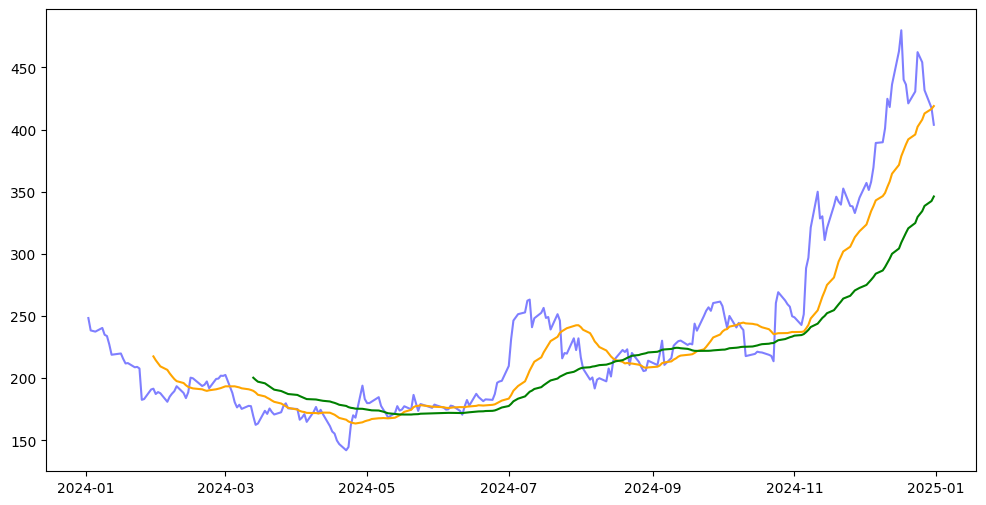

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df['Close'],label="Stock Price",color="blue",alpha=0.5)
plt.plot(df.index,df['SMA_20'],label="SMA 20",color="orange")
plt.plot(df.index,df['SMA_50'],label="SMA 50",color="green")

plt.show()

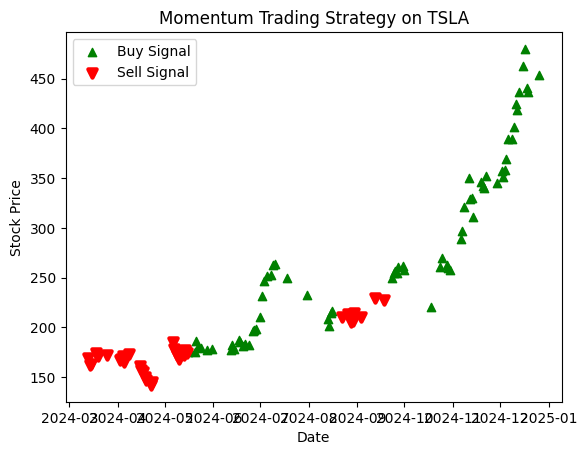

In [6]:
# Buy signals

plt.scatter(df.index[df['Signal'] == 1],df['Close'][df['Signal'] == 1],marker='^',color='green',label="Buy Signal")

# Sell signals
plt.scatter(df.index[df['Signal'] == -1], df['Close'][df['Signal'] == -1], label="Sell Signal", marker="v", color="red", alpha=1, lw=3)

plt.legend()
plt.title(f"Momentum Trading Strategy on {stock}")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()